**Exercise**

figure out the salary for two candidate  
**2 yr experience, 9 test score, 6 interview score**  
**12 yr experience, 10 test score, 10 interview score**

In [126]:
import pandas as pd
import numpy as np
from word2number import w2n
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [71]:
data = pd.read_csv("hiring.csv")
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [72]:
data.iloc[1,0] = ["one"]
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,one,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [73]:
data.iloc[0,0] = ["two"]

In [74]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,two,8.0,9,50000
1,one,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [75]:
#filling missing data of column test_score(out of 10)
test_score = int(data['test_score(out of 10)'].mean())
test_score

7

In [76]:
data['test_score(out of 10)'] = data['test_score(out of 10)'].fillna(test_score)

In [77]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,two,8.0,9,50000
1,one,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [78]:
data.info

<bound method DataFrame.info of   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        two                    8.0                           9      50000
1        one                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    7.0                           7      72000
7     eleven                    7.0                           8      80000>

In [80]:
data["experience"] = data.experience.astype(str) #make sure the column is of type string

In [81]:
data.experience=data.experience.apply(w2n.word_to_num)

In [82]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,2,8.0,9,50000
1,1,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [92]:
model = linear_model.LinearRegression()
model.fit(data[['experience','test_score(out of 10)','interview_score(out of 10)']],data['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
model.predict([[2,9,6]])

array([51611.32053587])

In [94]:
model.predict([[12,10,10]])

array([95020.06611379])

In [104]:
#Plot data in 3D of two features and one target
X = data[['experience','test_score(out of 10)']]
Y = data['salary($)']

In [107]:
#Prepare model data point for visualization
x = X.iloc[:, 0]  #iloc() function enables us ro select a particular cell of dataset
y = X.iloc[:, 1]
z = Y

In [110]:
x_pred = np.linspace(0,11,20) #range of experience value
y_pred = np.linspace(5,11,20) #range of test_score number

In [111]:
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [123]:
model = model.fit(X,Y)
predicted = model.predict(model_viz)

In [129]:
accurate = model.score(X,Y)

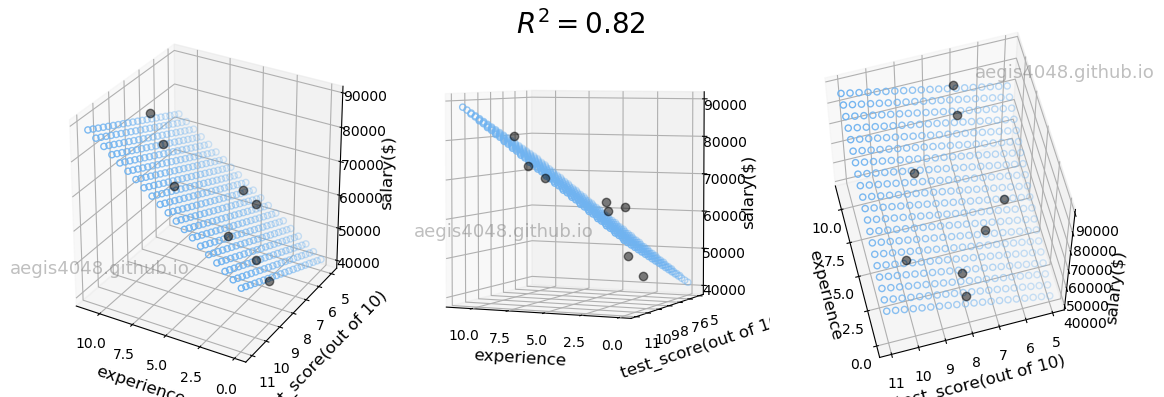

In [130]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('experience', fontsize=12)
    ax.set_ylabel('test_score(out of 10)', fontsize=12)
    ax.set_zlabel('salary($)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % accurate, fontsize=20)

fig.tight_layout()

In [134]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,2,8.0,9,50000
1,1,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [137]:
X = data[['experience','interview_score(out of 10)']]
Y = data['salary($)']

In [145]:
x = X.iloc[:, 0]
y = X.iloc[:, 1]
y = Y


In [146]:
x_pred = np.linspace(0,11,20) #range of experience value
y_pred = np.linspace(6,11,20) #range of test_score number
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
model = model.fit(X,Y)
predicted = model.predict(model_viz)
accurate = model.score(X,Y)
accurate

0.8614829836051303